In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import dfa
import numpy as np
import matplotlib.pyplot as plt
import os
from evaluation import read_result
import plot_util

In [3]:
result_name = os.path.join(os.getcwd(),'data/2022-06-26_c_ee11.57199543729056_c_ei10.307919639315172_results.csv')
_, data, dt = read_result(result_name)
print(dt)

7.2389587809176845


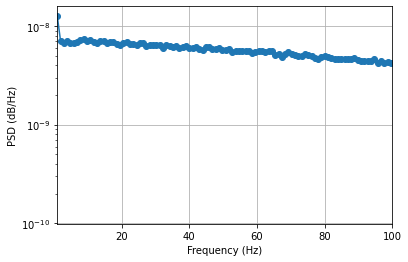

In [4]:
_, _, = plot_util.plot_psd(data,dt=0.5)

In [5]:
raw = dfa.load_data([data])
dfa_exp, _, x, y, model, residual = dfa.compute_DFA(raw, return_fitting=True, l_freq=0.5, h_freq=4)

Creating RawArray with float64 data, n_channels=1, n_times=2000000
    Range : 0 ... 1999999 =      0.000 ...  1000.000 secs
Ready.


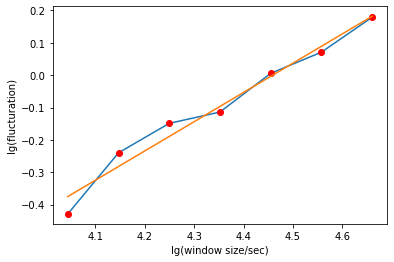

In [8]:
plt.figure()
plt.plot(x,y)
plt.xlabel('lg(window size/sec)')
plt.ylabel('lg(flucturation)')
poly1d_fn = np.poly1d(model) 
plt.plot(x,y, 'ro', x, poly1d_fn(x))
# plt.xlim(0, 5)
# plt.ylim(0, 20)
plt.show()